In [ ]:
using Pkg
pkg_folder = "../"
Pkg.activate(pkg_folder)
using BenchmarkTools
import Markdown; Base.showable(::MIME"text/markdown", ::Markdown.MD) = false # to make sth like """?replace"""  works for vscode backend, remember to choose Jupyter kernel
include(pkg_folder*"src/initialize.jl")
Threads.nthreads() #

  Activating project at `~/Realizibility_index/bnc_julia`


24

In [129]:
using GLMakie, GraphMakie
using GraphMakie.NetworkLayout
# using StableRNGs

In [139]:
# N = [1 1 0 -1 0
#      1 0 1 0 -1]
N = N_generator(3,6)
# N = [1 1 0 -1 0 0 0
#      1 0 1 0 -1 0 0 
#      0 1 1 0 0 -1 0
#      0 1 0 0 1 0 -1]
model = Bnc(N=N)
model.direction
whole_grh = get_binding_network_grh(model)

{9, 9} undirected simple Int64 graph

In [140]:
f,ax,p = draw_binding_network_grh(model,whole_grh)
display(f)

GLMakie.Screen(...)

In [195]:
grh = get_qK_neighbor_grh(model,1)

{22, 32} directed simple Int64 graph

In [196]:
f,ax,p = draw_vertices_neighbor_graph(model,grh)
display(f)

GLMakie.Screen(...)

In [214]:
pths = find_all_complete_paths(model,grh)

common_vs = Set([10, 12, 8])
common_vs = Set{Int64}()
sources = Set([5, 12, 8, 1, 6, 11, 9, 3, 7, 4, 2, 10])
sinks = Set([13, 10, 12, 8])


59-element Vector{Vector{Int64}}:
 [8]
 [5, 21, 17, 13]
 [5, 21, 19, 15, 13]
 [5, 21, 19, 15, 16, 14, 13]
 [5, 21, 19, 17, 13]
 [5, 21, 22, 18, 14, 13]
 [5, 21, 22, 18, 17, 13]
 [5, 21, 22, 20, 16, 14, 13]
 [5, 21, 22, 20, 18, 14, 13]
 [5, 21, 22, 20, 18, 17, 13]
 [5, 21, 22, 20, 19, 15, 13]
 [5, 21, 22, 20, 19, 15, 16, 14, 13]
 [5, 21, 22, 20, 19, 17, 13]
 ⋮
 [9, 15, 16, 14, 13]
 [9, 19, 15, 13]
 [9, 19, 15, 16, 14, 13]
 [9, 19, 17, 13]
 [3, 15, 13]
 [3, 15, 16, 14, 13]
 [3, 19, 15, 13]
 [3, 19, 15, 16, 14, 13]
 [3, 19, 17, 13]
 [2, 14, 13]
 [2, 18, 14, 13]
 [2, 18, 17, 13]

In [215]:
ord_pths = find_reaction_order_for_pathes(model, pths, 1, 4; deduplicate=true)

59-element Vector{Vector{<:Real}}:
 [0.0]
 [0.0, -Inf, -0.5, -1.0]
 [0.0, -Inf, -1.0, -Inf, -1.0]
 [0.0, -Inf, -1.0, -Inf, 0.0, -1.0]
 [0.0, -Inf, -1.0, -0.5, -1.0]
 [0.0, -Inf, 0.0, -1.0]
 [0.0, -Inf, 0.0, -0.5, -1.0]
 [0.0, -Inf, 0.0, -1.0]
 [0.0, -Inf, 0.0, -1.0]
 [0.0, -Inf, 0.0, -0.5, -1.0]
 [0.0, -Inf, 0.0, -1.0, -Inf, -1.0]
 [0.0, -Inf, 0.0, -1.0, -Inf, 0.0, -1.0]
 [0.0, -Inf, 0.0, -1.0, -0.5, -1.0]
 ⋮
 [0.0, -Inf, 0.0, -1.0]
 [0.0, -1.0, -Inf, -1.0]
 [0.0, -1.0, -Inf, 0.0, -1.0]
 [0.0, -1.0, -0.5, -1.0]
 [0.0, -Inf, -1.0]
 [0.0, -Inf, 0.0, -1.0]
 [0.0, -1.0, -Inf, -1.0]
 [0.0, -1.0, -Inf, 0.0, -1.0]
 [0.0, -1.0, -0.5, -1.0]
 [0.0, -1.0]
 [0.0, -1.0]
 [0.0, -0.5, -1.0]

In [216]:
countmap(ord_pths)

Dict{Vector{<:Real}, Int64} with 16 entries:
  [0.0, -1.0]                             => 10
  [0.0, -Inf, 0.0, -1.0]                  => 8
  [0.0, -Inf, -1.0, -0.5, -1.0]           => 2
  [0.0, -Inf, -1.0, -Inf, 0.0, -1.0]      => 2
  [0.0, -Inf, 0.0, -1.0, -Inf, -1.0]      => 2
  [0.0, -1.0, -Inf, 0.0, -1.0]            => 4
  [0.0, -0.5, -1.0]                       => 6
  [0.0, -1.0, -Inf, -1.0]                 => 4
  [0.0, -Inf, -0.5, -1.0]                 => 2
  [0.0, -Inf, 0.0, -0.5, -1.0]            => 4
  [0.0, -Inf, 0.0, -1.0, -0.5, -1.0]      => 2
  [0.0, -Inf, -1.0, -Inf, -1.0]           => 2
  [0.0]                                   => 3
  [0.0, -Inf, 0.0, -1.0, -Inf, 0.0, -1.0] => 2
  [0.0, -1.0, -0.5, -1.0]                 => 4
  [0.0, -Inf, -1.0]                       => 2

In [219]:
conds =map(i -> find_conditions_for_path_direct(model,pths[i],1), 1:length(pths))

59-element Vector{CDDLib.Polyhedron{Float64}}:
 HyperPlane([1.0, -1.0, -0.0, -0.0, -0.0], 0.0) ∩ HalfSpace([-0.0, -0.0, -0.0, -0.0, -0.0], 1.0) ∩ HalfSpace([-0.0, -0.0, 2.0, -1.0, -1.0], 0.0) ∩ HalfSpace([-0.0, -0.0, 1.0, -1.0, -0.0], 0.0) ∩ HalfSpace([-1.0, -0.0, 1.0, -0.0, -0.0], 0.0)
 HalfSpace([-2.0, -0.0, -0.0, 1.0, 1.0], 0.0) ∩ HalfSpace([-1.0, -0.0, -0.0, -0.0, 1.0], 0.0) ∩ HalfSpace([-0.0, 1.0, -1.0, -0.0, -0.0], 0.0) ∩ HalfSpace([-1.0, -0.0, -0.0, -0.0, 1.0], 0.3010299956639812) ∩ HalfSpace([1.0, -0.0, -1.0, -0.0, -0.0], 0.0) ∩ HalfSpace([-0.0, -0.0, -1.0, -0.0, 1.0], 0.0) ∩ HalfSpace([-0.0, -0.0, -2.0, 1.0, 1.0], 0.0) ∩ HalfSpace([-3.321928094887362, 3.321928094887362, -3.321928094887362, 1.660964047443681, 1.660964047443681], 0.0) ∩ HalfSpace([-3.321928094887362, 3.321928094887362, -3.321928094887362, -0.0, 3.321928094887362], 0.0) ∩ HalfSpace([-3.321928094887362, -0.0, -0.0, 1.660964047443681, 1.660964047443681], 0.0) ∩ HalfSpace([-3.321928094887362, -0.0, -0.0, -0.0, 3.321

In [220]:
sum(isempty.(conds))

10

In [221]:
V = calc_volume(conds,N=300000)
Vs = V .|> x->x[1]
sum(Vs)

full_dim_idx = [2, 3, 5, 14, 15, 16, 17, 18, 19, 20, 21, 23, 24, 25, 27, 28, 30, 40, 41, 42, 43, 44, 46, 47, 49, 51, 52, 54, 56, 57, 58, 59]
total_counts = [0, 17271, 9002, 0, 898, 0, 0, 0, 0, 0, 0, 0, 0, 43401, 11915, 12999, 10491, 9125, 911, 35, 897, 0, 33, 79010, 6200, 0, 4677, 2242, 0, 298, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6546, 840, 26, 0, 41, 0, 0, 7094, 0, 299, 0, 22, 16441, 0, 906, 0, 37, 9440, 3546, 1577]


0.8542478010818663

In [223]:
dim(conds[2])

5

In [174]:
sum(Vs)

1.5227000951320877

In [173]:

group_sum(ord_pths, Vs)

Dict{Vector{<:Real}, Float64} with 15 entries:
  [0.0, -1.0]                             => 0.55199
  [0.0, -Inf, 0.0, -1.0]                  => 0.35293
  [0.0, -Inf, -1.0, -0.5, -1.0]           => 0.00405275
  [0.0, -Inf, -1.0, -Inf, 0.0, -1.0]      => 0.114805
  [0.0, -Inf, 0.0, -1.0, -Inf, -1.0]      => 0.0266425
  [0.0, -1.0, -Inf, 0.0, -1.0]            => 0.000126137
  [0.0, -0.5, -1.0]                       => 0.100527
  [0.0, -1.0, -Inf, -1.0]                 => 0.00713552
  [0.0, -Inf, -0.5, -1.0]                 => 0.0731752
  [0.0, -Inf, 0.0, -0.5, -1.0]            => 0.0564149
  [0.0, -Inf, 0.0, -1.0, -0.5, -1.0]      => 0.00261944
  [0.0, -Inf, -1.0, -Inf, -1.0]           => 0.0376023
  [0.0, -1.0, -0.5, -1.0]                 => 0.00030587
  [0.0, -Inf, 0.0, -1.0, -Inf, 0.0, -1.0] => 0.114805
  [0.0, -Inf, -1.0]                       => 0.0795685

In [72]:
get_change_dir_qK_direct(model,get_neighbors(model,1;singular=false)[10],get_perm(model,1),check=true)

18-element SparseVector{Float64, Int64} with 5 stored entries:
  [1 ]  =  -2.0
  [4 ]  =  -1.0
  [9 ]  =  1.0
  [15]  =  1.0
  [17]  =  1.0

In [83]:
get_change_dir_qK_direct(model,get_neighbors(model,1;singular=false)[10],get_perm(model,1),check=true) |> x->sym_direction(model,x) 

"-q₁ -q₄ ; +K₁ +K₇ +K₉ "

In [31]:
get_change_dir_qK(model,get_perm(model,1),get_neighbors(model,1;singular=false)[10])

18-element SparseVector{Float64, Int8} with 5 stored entries:
  [1 ]  =  2.0
  [4 ]  =  1.0
  [9 ]  =  -1.0
  [15]  =  -1.0
  [17]  =  -1.0

In [45]:
get_interface(model,get_perm(model,1),get_neighbors(model,1;singular=true)[6])[2]

LoadError: BoundsError: attempt to access 0-element Vector{Vector{Int8}} at index [1]

In [41]:
get_interface_direct(model, get_perm(model,1), get_neighbors(model,1;singular=false)[6])[2]

-0.3010299956639812

In [12]:
v= calc_volume(conds)

10-element Vector{Tuple{Float64, Float64}}:
 (0.08372659909712771, 0.000542862244272676)
 (0.12489944093335127, 0.0006479707634960289)
 (0.12488844097560717, 0.0006479463013775612)
 (0.04170976050308296, 0.0003918413409333377)
 (0.12533643925464025, 0.0006489412513185651)
 (0.041720760460827074, 0.0003918907589095014)
 (0.12537643910098245, 0.0006490299541974393)
 (0.08281960258131749, 0.0005401809928738908)
 (0.12459744209346739, 0.0006472985706697015)
 (0.12494044077585206, 0.0006480619260295242)

In [13]:
V = v .|> x->x[1]

10-element Vector{Float64}:
 0.08372659909712771
 0.12489944093335127
 0.12488844097560717
 0.04170976050308296
 0.12533643925464025
 0.041720760460827074
 0.12537643910098245
 0.08281960258131749
 0.12459744209346739
 0.12494044077585206

In [14]:
group_sum(ord_pth,V)

Dict{Vector{Float64}, Float64} with 4 entries:
  [0.0, -Inf, -1.0, -Inf, -1.0] => 0.0417208
  [0.0, -1.0]                   => 0.374437
  [0.0, -1.0, -Inf, -1.0]       => 0.0837266
  [0.0, -Inf, -1.0]             => 0.500131

In [15]:
get_vertices(model)

12-element Vector{Vector{Int8}}:
 [1, 2, 3]
 [1, 2, 5]
 [1, 4, 3]
 [1, 4, 5]
 [4, 2, 3]
 [4, 2, 5]
 [4, 4, 3]
 [4, 4, 5]
 [5, 2, 3]
 [5, 2, 5]
 [5, 4, 3]
 [5, 4, 5]

_get_i_j_perms (generic function with 1 method)

In [12]:
_calc_change_col([1,2,3],[1,2,5])

(3, 5)

In [ ]:
123, 133,433,435

In [16]:
_get_i_j_perms([1,2,3],[4,3,5])

(2, 3, 2, 5)

In [29]:
locate_C_row(model,3,3,5)

4

In [30]:
get_C_C0_qK!(model,[1,2,5])[1][4,:]

5-element SparseVector{Float64, Int64} with 2 stored entries:
  [1]  =  1.0
  [5]  =  -1.0

In [24]:
function locate_C_row(Bnc, i ,j1, j2)
    cls_start = Bnc._C_partition_idx[i]
    i_j1= findfirst(x-> x == j1, Bnc._valid_L_idx[i])
    i_j2= findfirst(x-> x == j2, Bnc._valid_L_idx[i])
    if isnothing(i_j1) || isnothing(i_j2)
        error("Either j1 or j2 is not a valid change direction for regime $i")
    end
    i = i_j2 < i_j1 ? i_j2 : i_j2 - 1
    return cls_start + i -1
end

locate_C_row (generic function with 2 methods)

In [232]:
function find_row_of_pair(Bnc, perm, j1, j2, i)
    row = 1
    for ii in 1:Bnc.d
        valid_idx = Bnc._valid_L_idx[ii]
        rgm = perm[ii]
        for col in valid_idx
            if col != rgm
                if ii == i && rgm == j2 && col == j1
                    return row
                end
                row += 1
            end
        end
    end
    return nothing  # not found
end

find_row_of_pair (generic function with 1 method)

In [123]:
p1 = Float32[-1.1394957, -0.3273319]
p2 = Float32[1.6665182, -0.551997]

shaft = p2.-p1

2-element Vector{Float32}:
  2.806014
 -0.2246651

In [ ]:
f = Figure(size = (1000,1000))
ax = Axis(f[1, 1])

edge_dir1 = get_edge_weight_vec(model,1)
edge_dir2 = get_edge_weight_vec(model,2)


node_labels = model.vertices_perm .|> x-> Int.(x) |> repr # perms
node_colors = (model.vertices_nullity .> 0) .|> x-> x ? :red : :blue # singular, non-singular
node_size = (model.vertices_nullity .> 0) .|> x-> x ? 10 : 50

i_labels = map(model.vertices_perm) do v
    n = get_nullity!(model,v)
    r_ord = get_H!(model,v)[2,1]
    rlt = n > 0 ? model.direction*r_ord : r_ord
    return repr(round(rlt, digits=2))
end

p = graphplot!(ax, grh,
                nlabels = node_labels,
                nlabels_color = node_colors,
                node_size = node_size,
                edge_color = (:gray, 0.2),
                ilabels = i_labels,
                # nlabels_align = (:center, :center),
                layout=Spring(;dim=2))

arws1 = map(edge_dir1) do (edge, meta)
   u,v = edge.src, edge.dst
   mag = meta[:magnitude]
    p1 = p.node_pos[][u]
    p2 = p.node_pos[][v]
    # shift = p2 .- p1
    # p1 .-= 0.8 * shift
    shaftwidth = mag *5
    tipwidth = mag *10
    return [p1,p2], shaftwidth, tipwidth, (:red,0.5)
end

arws2 = map(edge_dir2) do (edge, meta)
   u,v = edge.src, edge.dst
   mag = meta[:magnitude]
    p1 = p.node_pos[][u]
    p2 = p.node_pos[][v]
    # shift = p2 .- p1
    # p1 .-= 0.8 * shift
    shaftwidth = mag *5
    tipwidth = mag *10
    # tiplength = mag *30
    return [p1,p2], shaftwidth, tipwidth ,(:blue,0.5)
end

for (points, shaftwidth, tipwidth, color) in arws1
    arrows2d!(ax, points...; shaftwidth=shaftwidth, tipwidth=tipwidth,tiplength=20, color=color, argmode=:endpoint,transparency=true)
end



hidedecorations!(ax); hidespines!(ax)
display(f)

GLMakie.Screen(...)

In [21]:
arws1

18-element Vector{Tuple{Vector{Point{3, Float32}}, Float64, Float64, Symbol}}:
 ([[0.010169514, 0.7801474, 0.30136675], [1.5884871, 0.25570363, -0.46584392]], 10.0, 15.0, :red)
 ([[0.010169514, 0.7801474, 0.30136675], [-0.6137208, -0.87456024, 0.77818376]], 10.0, 15.0, :red)
 ([[1.5884871, 0.25570363, -0.46584392], [0.8971734, -1.2464585, 0.030253625]], 10.0, 15.0, :red)
 ([[-0.6137208, -0.87456024, 0.77818376], [0.8971734, -1.2464585, 0.030253625]], 10.0, 15.0, :red)
 ([[-0.03277085, 1.7454268, 1.1024084], [1.4896294, 1.2860174, 0.41459092]], 10.0, 15.0, :red)
 ([[-0.03277085, 1.7454268, 1.1024084], [-0.62738997, 0.19941607, 1.6104867]], 10.0, 15.0, :red)
 ([[1.4896294, 1.2860174, 0.41459092], [0.9270372, -0.31655785, 0.92797524]], 10.0, 15.0, :red)
 ([[-0.62738997, 0.19941607, 1.6104867], [0.9270372, -0.31655785, 0.92797524]], 10.000000000000009, 15.000000000000014, :red)
 ([[-0.62738997, 0.19941607, 1.6104867], [-0.6137208, -0.87456024, 0.77818376]], 10.0, 15.0, :red)
 ([[-0.6273899

In [ ]:
# using MetaGraphsNext
# g = MetaGraph(SimpleDiGraph();
#     label_type = Symbol,
#     vertex_data_type = Vector{Int8},
#     edge_data_type = Vector{Int8},
#     graph_data = "test_qK_graph")

Meta graph based on a SimpleDiGraph{Int64} with vertex labels of type Symbol, vertex metadata of type Vector{Int8}, edge metadata of type Vector{Int8}, graph metadata given by "test_qK_graph", and default weight 1.0

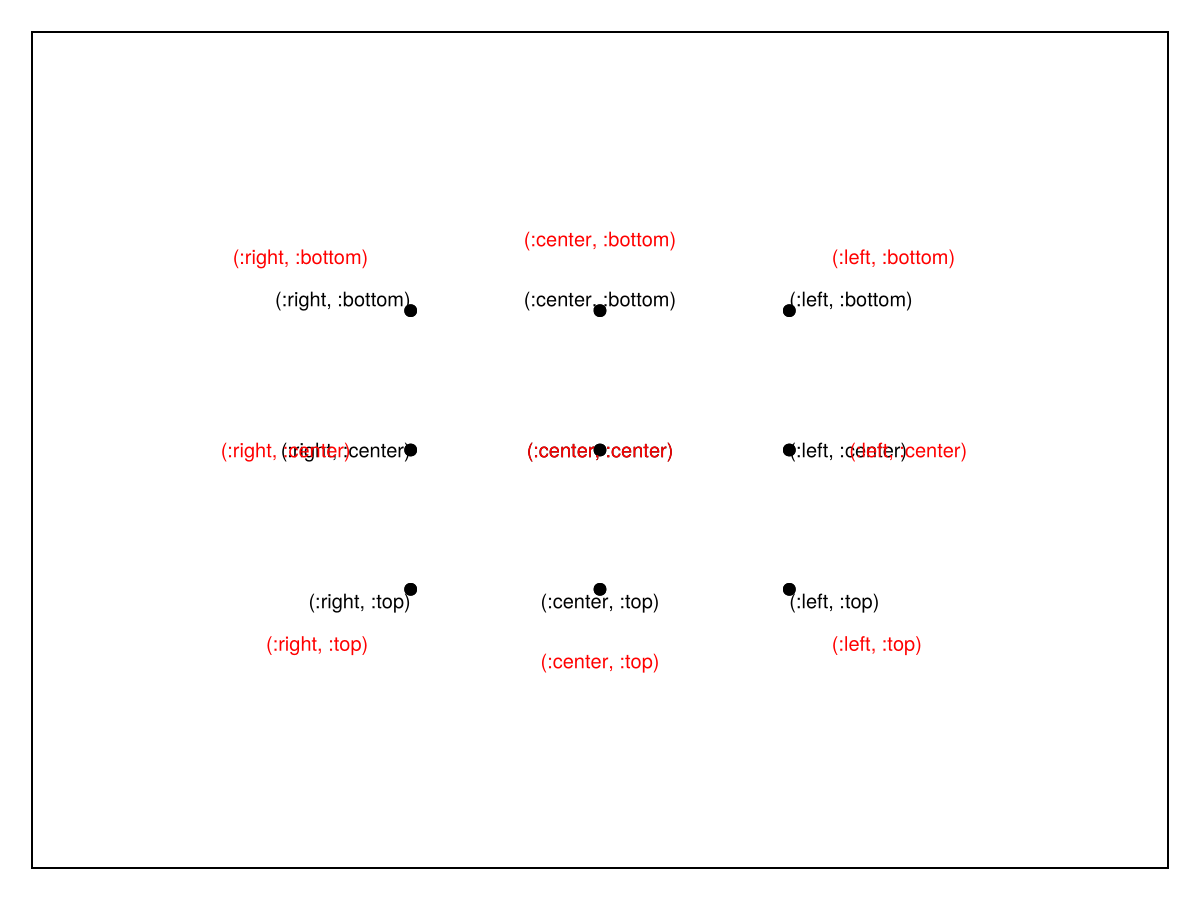

In [193]:
# using Graphs, GraphMakie, CairoMakie, NetworkLayout
import DataStructures: DefaultDict

g = SimpleGraph(9)
nlabels_align = [(:right, :bottom),
                 (:center, :bottom),
                 (:left, :bottom),
                 (:right, :center),
                 (:center, :center),
                 (:left, :center),
                 (:right, :top),
                 (:center, :top),
                 (:left, :top)]

nlabels = repr.(nlabels_align)
nlabels_fontsize = 10

fig, ax, p = graphplot(g; layout=SquareGrid(), nlabels, nlabels_align, nlabels_fontsize)
graphplot!(g; layout=SquareGrid(), nlabels, nlabels_align, nlabels_distance=30,
           nlabels_color=:red, nlabels_fontsize)
hidedecorations!(ax); xlims!(-2,4); ylims!(-4,2)
fig

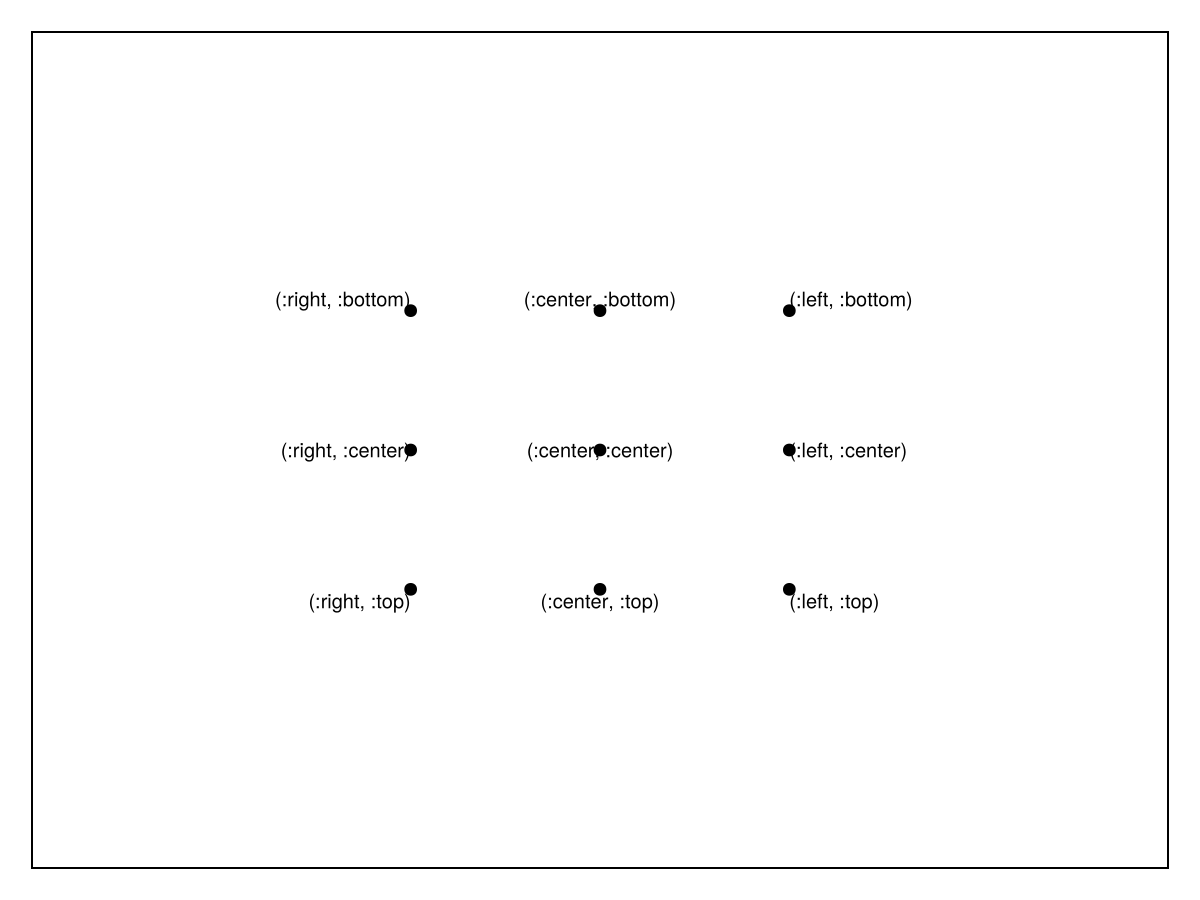

In [194]:
pop!(ax.scene.plots)
fig

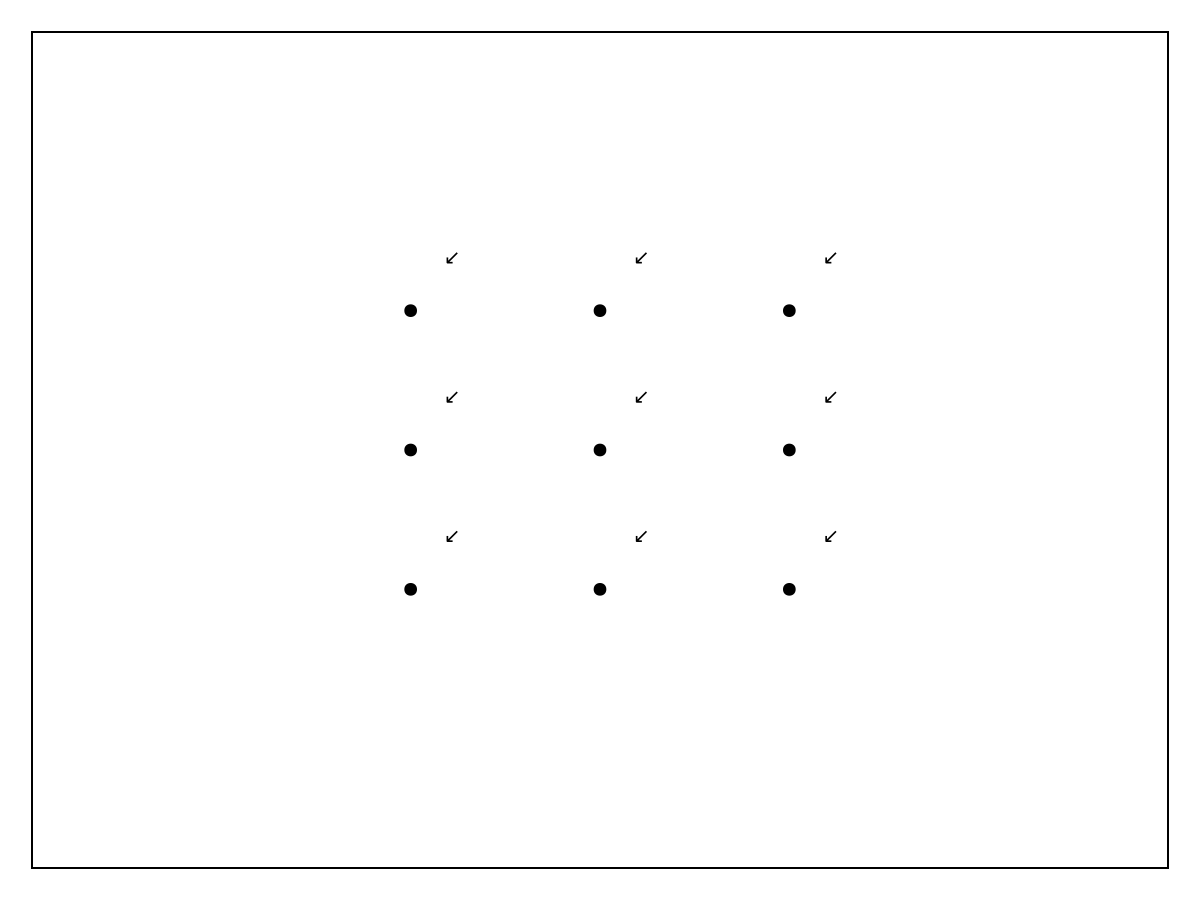

In [195]:
p[:nlabels_distance] = 10
p[:nlabels_align][] = [(:left, :bottom) for i in 1:nv(g)]
p[:nlabels][] = ["↙" for i in 1:nv(g)]
p[:nlabels_offset][] = Point2(0.1,0.2)
fig

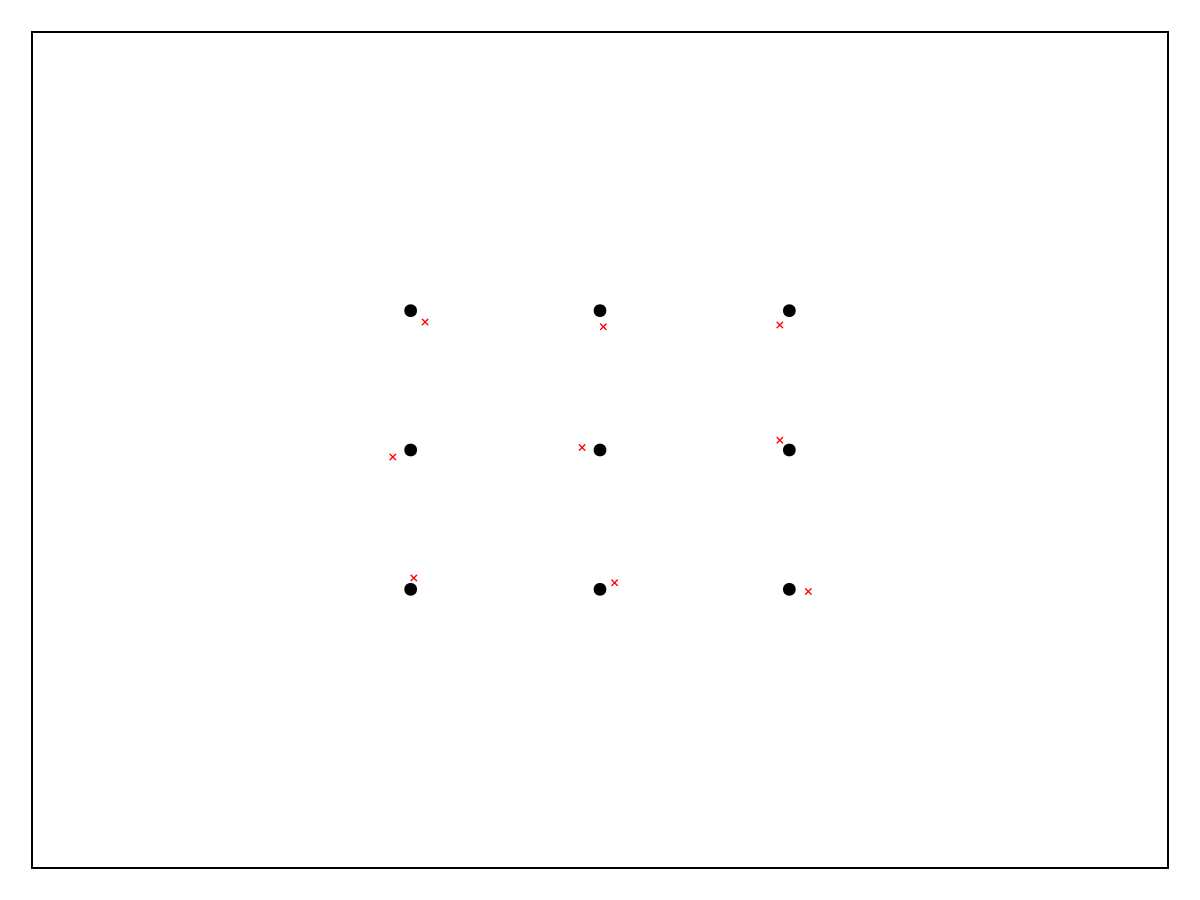

In [196]:
p[:nlabels_distance] = 0
p[:nlabels_align][] = [(:center, :center) for i in 1:nv(g)]
p[:nlabels][] = ["×" for i in 1:nv(g)]
p[:nlabels_color][] = :red
p[:nlabels_offset][] = [Point2(.1*cos(-2π/9*i),.1*sin(-2π/9*i)) for i in 1:nv(g)]
fig

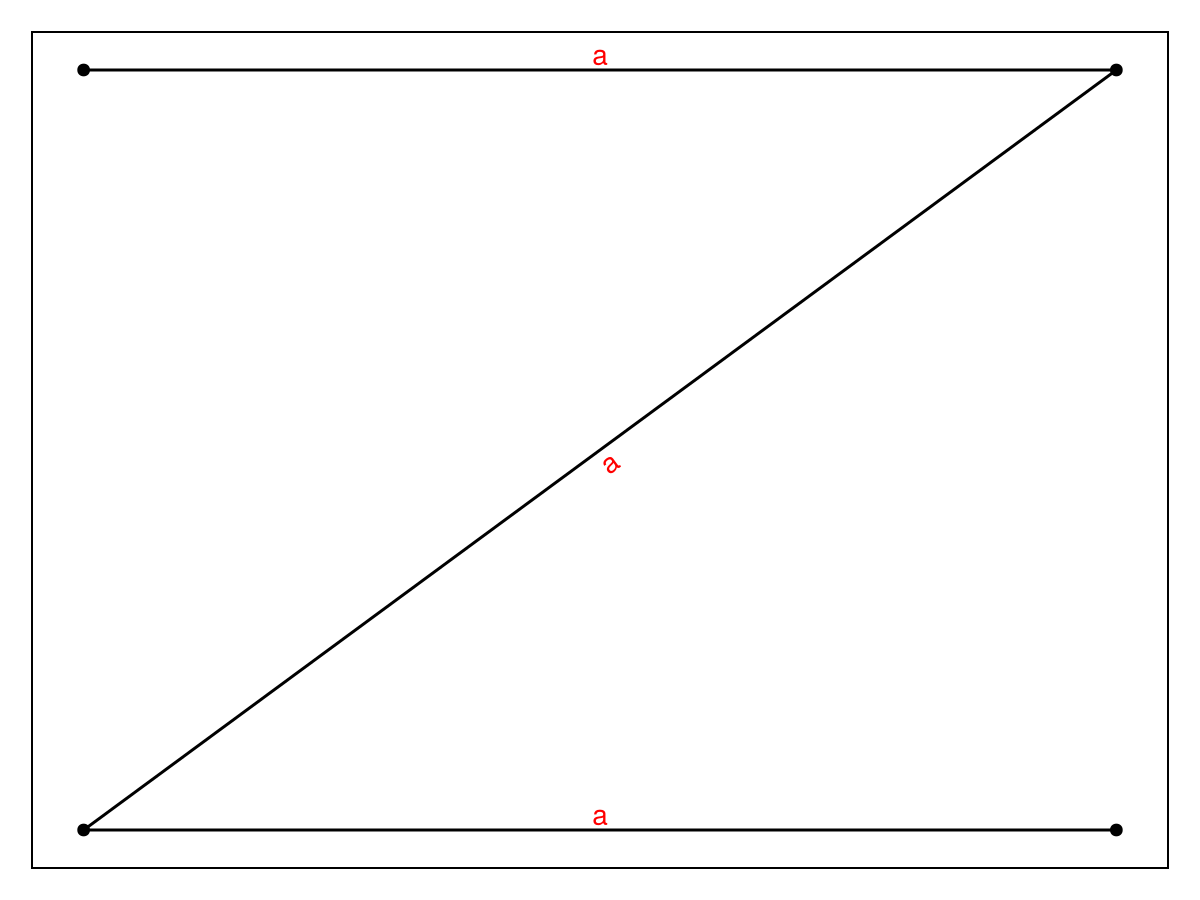

In [197]:
g = path_graph(4)
elabels = ["a" for i in 1:ne(g)]
elabels_align = (:center, :center)
fig, ax, p = graphplot(g; layout=SquareGrid(), elabels, elabels_align,
                       elabels_color=:red)
hidedecorations!(ax)
fig

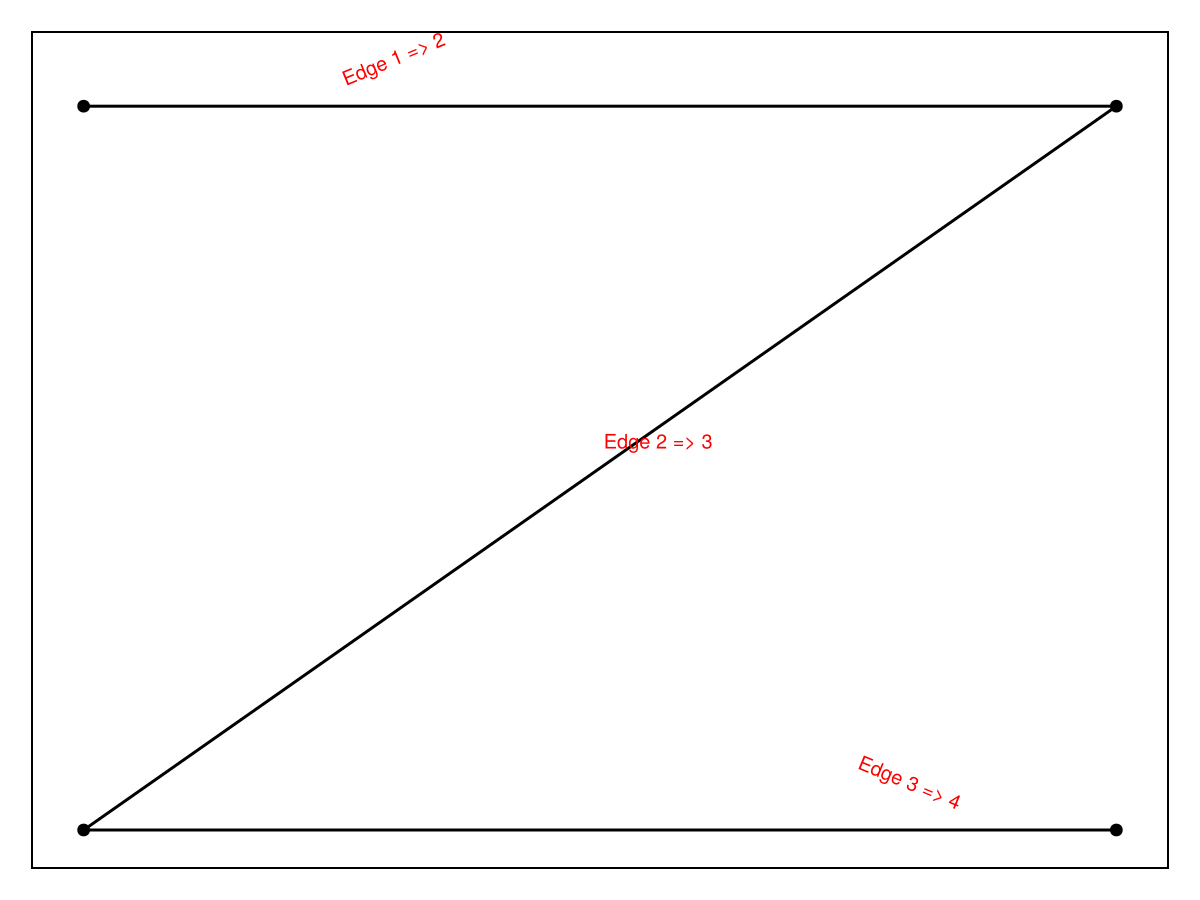

In [198]:
p[:elabels][] = repr.(edges(g))
p[:elabels_shift][] = [0.25, 0.5, 0.75]
p[:elabels_rotation][] = [π/8, 0, -π/8]
p[:elabels_offset][] = Point2(0.05,0.05)
p[:elabels_fontsize][] = 10
autolimits!(ax)
fig

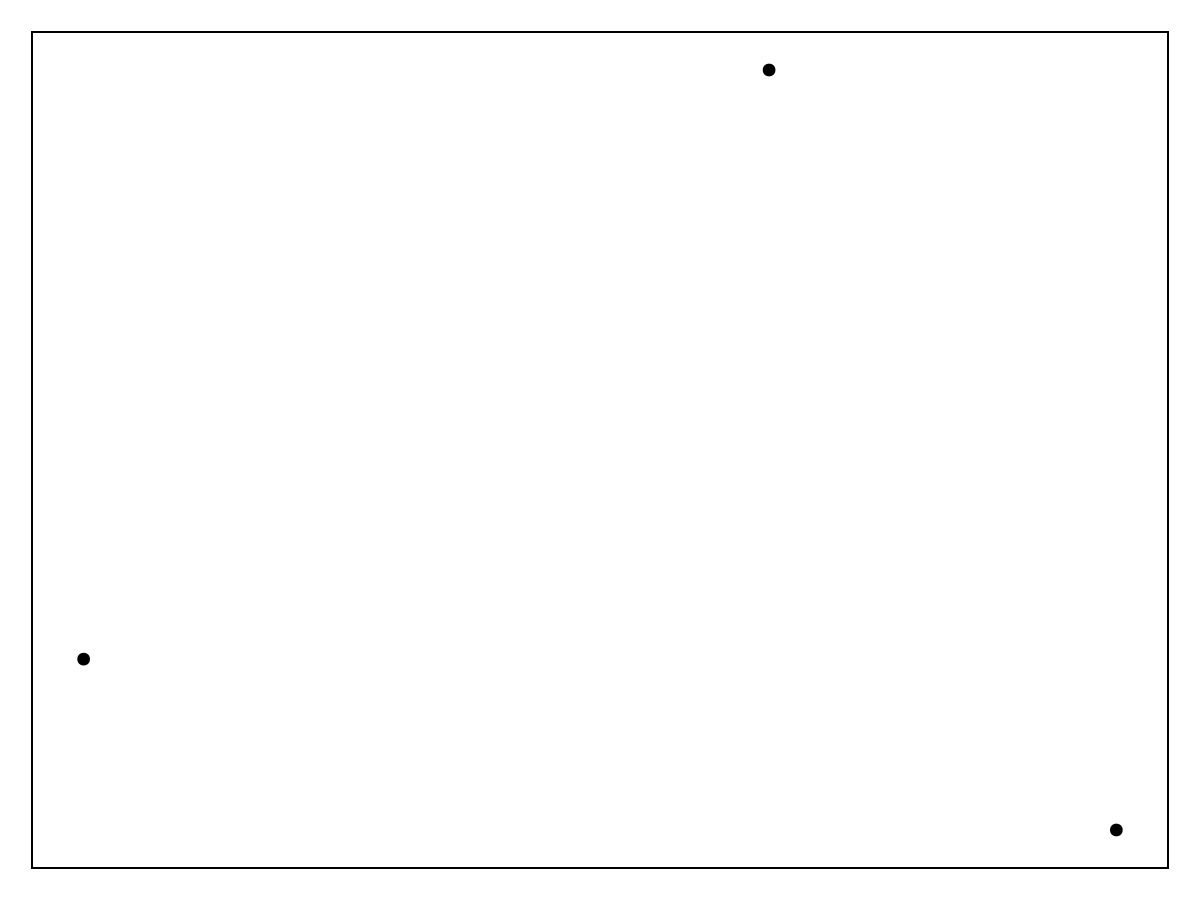

In [184]:
gn = Observable(SimpleDiGraph(3))
fig, ax, p = graphplot(gn)
hidedecorations!(ax)
fig

In [210]:
p[:node_pos].parent

ComputeEdge:
  callback:
    #19(::Tuple{Spring{2, Float64, Random.MersenneTwister}, SimpleDiGraph{Int64}})
    @ unknown method location
  inputs:
    ✓ Computed(:layout, Spring{2, Float64, Random.MersenneTwister}(2.0, 100, 2.0, Dict{Int64, Point{2, Float64}}(), Dict{Int64, StaticArraysCore.SVector{2, Bool}}(), Random.MersenneTwister(1)))
    ✓ Computed(:graph, SimpleDiGraph{Int64}(6, [[2, 3], [1, 3], [1, 2]], [[2, 3], [1, 3], [1, 2]]))
  outputs:
    ✓ Computed(:node_pos, Point{2, Float32}[[-1.2135845, -0.44256857], [0.28381398, 1.3274465], [1.0679927, -0.8543462]])
  dependents:
    ✓ ComputeEdge((::MapFunctionWrapper(#32))(…), 7 inputs, 1 output, 4 dependents)
    ✓ ComputeEdge((::MapFunctionWrapper(#34))(…), 3 inputs, 1 output, 3 dependents)
    ✓ ComputeEdge(compute_identity(…), 1 input, 1 output, 1 dependent)
    ✓ ComputeEdge((::MapFunctionWrapper(#49))(…), 2 inputs, 1 output, 1 dependent)

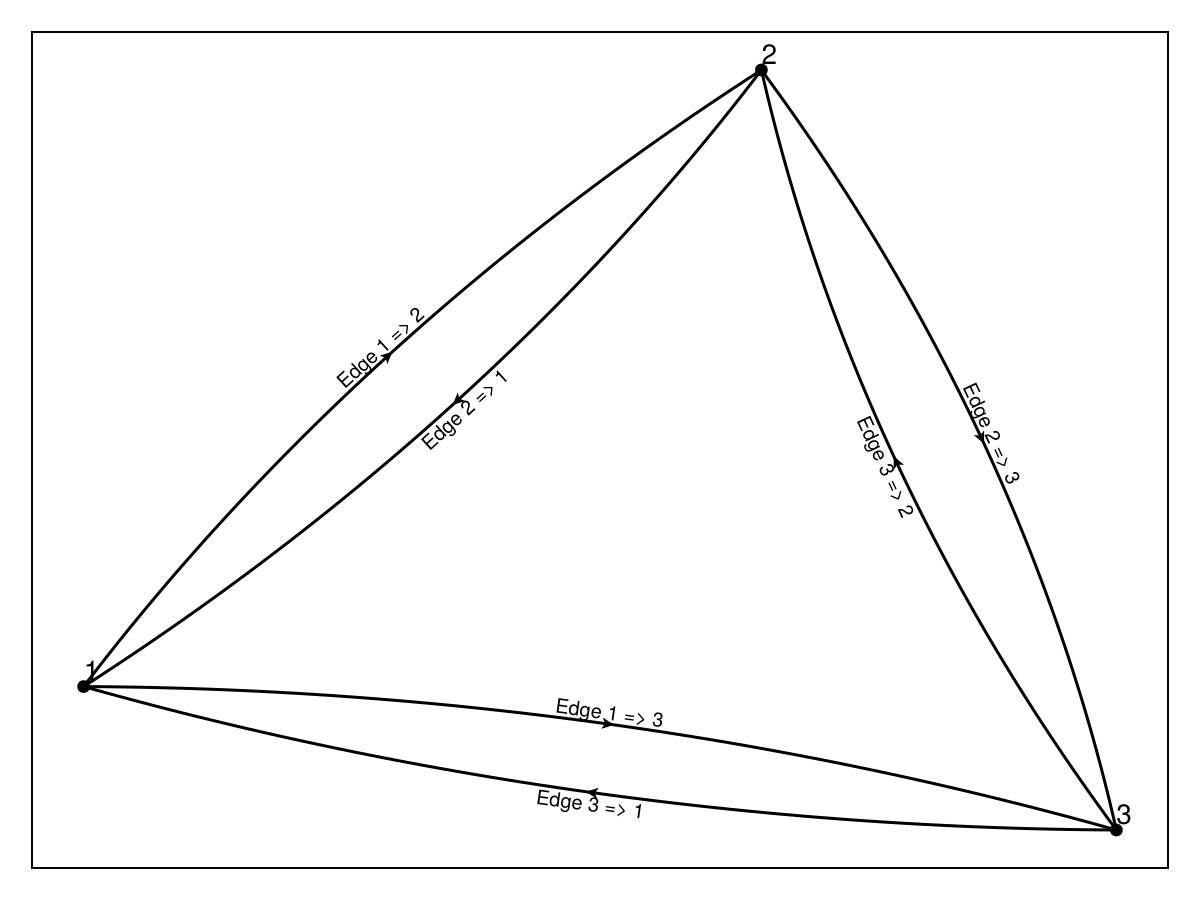

In [ ]:
g = complete_digraph(3)
elabels = repr.(edges(g))
nlabels = repr.(1:nv(g))
fig, ax, p = graphplot(g; elabels, nlabels, elabels_fontsize=10)
hidedecorations!(ax)


arrow p[:node_pos]


fig

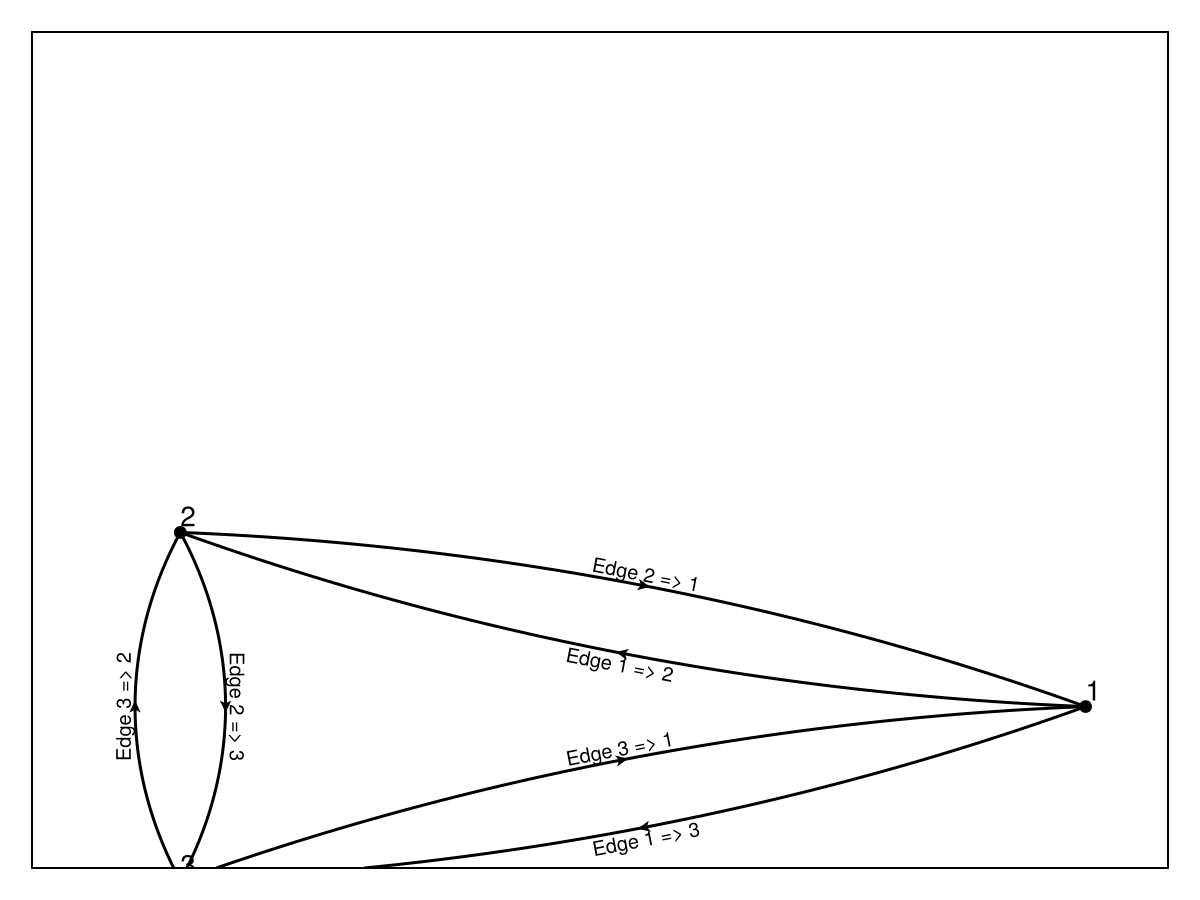

In [201]:
limits!(ax, ax.finallimits[]) # freeze the limits
p[:node_pos][] = Point2f.([(1., -.5), (-1.,0.), (-1.,-1.)]) # the Node position can be find by infer the :node_pos
hidedecorations!(ax)
fig

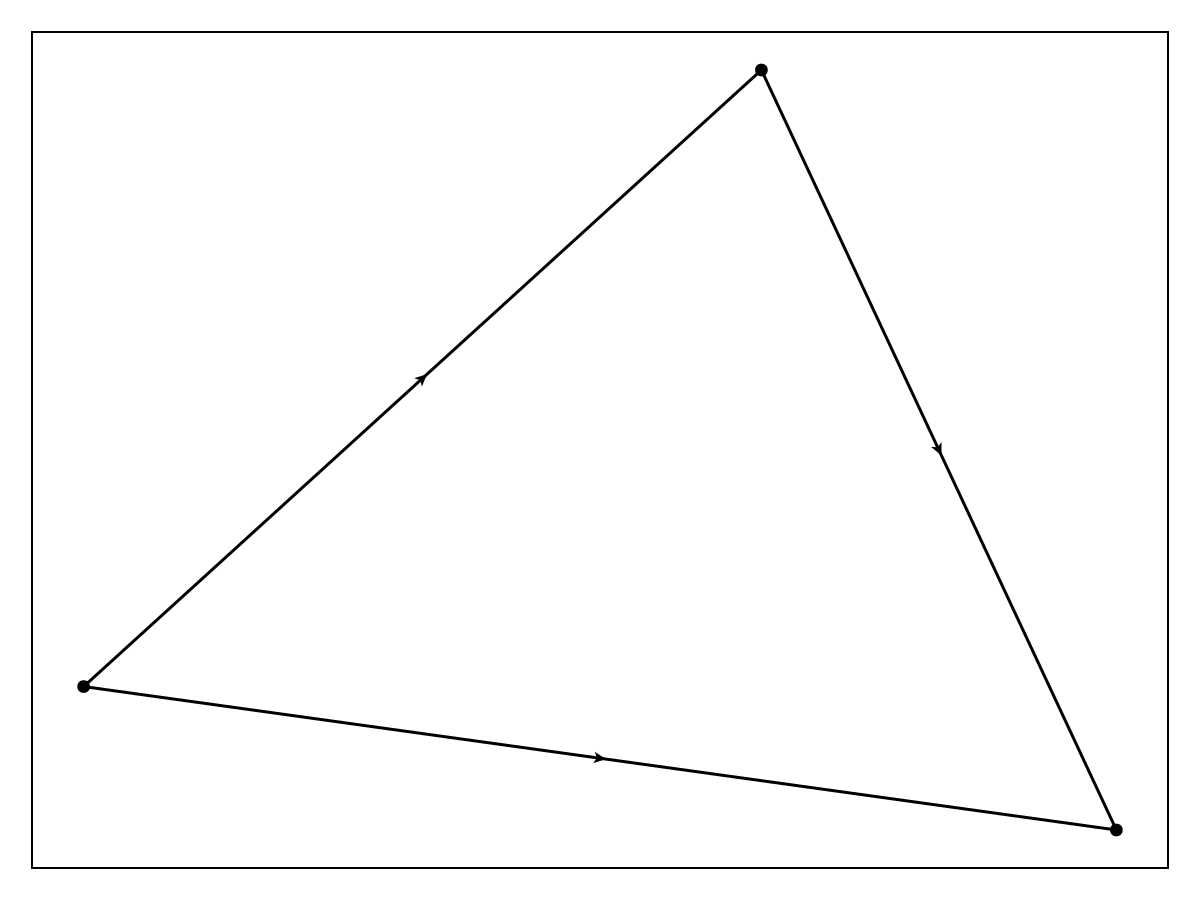

In [187]:
add_edge!(gn[], 1, 2)
add_edge!(gn[], 1, 3)
add_edge!(gn[], 2, 3)
notify(gn)
autolimits!(ax)
fig

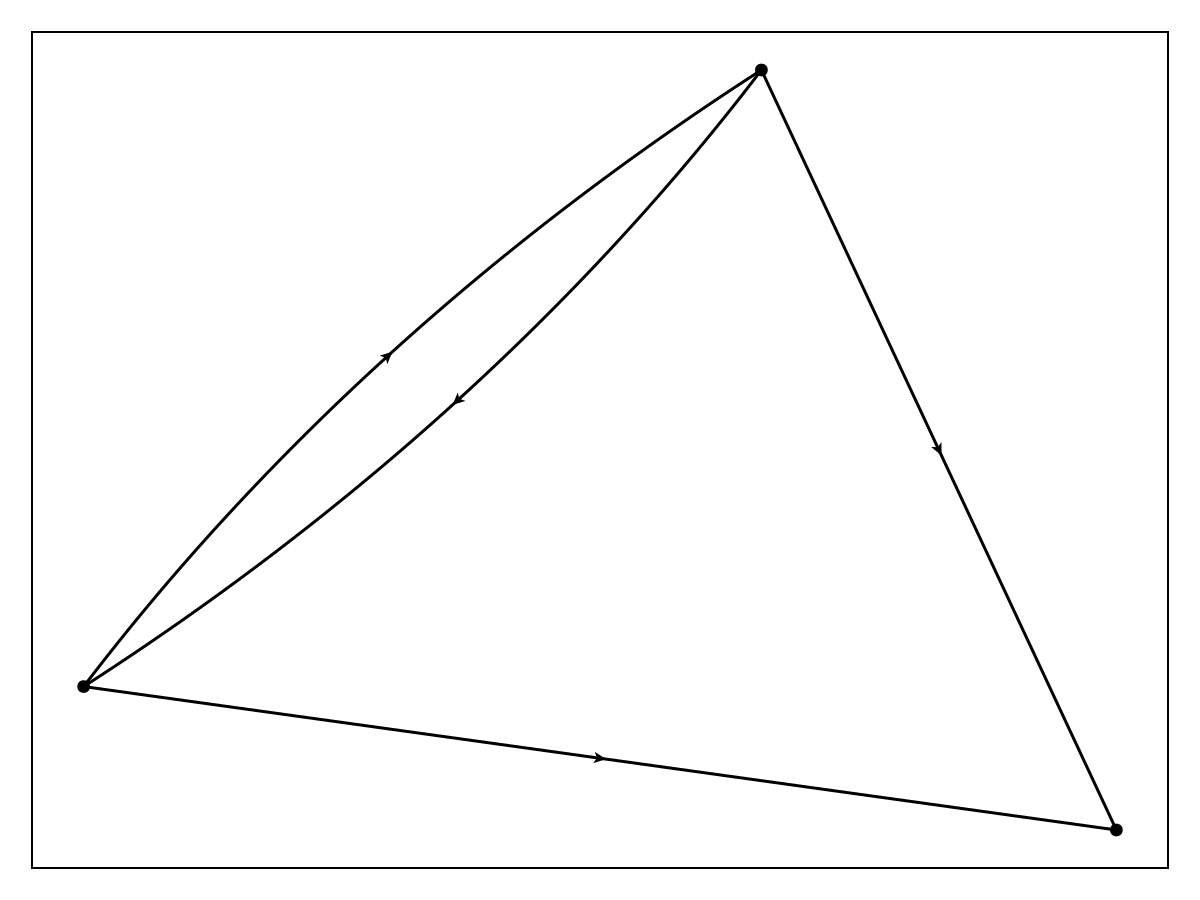

In [188]:
add_edge!(gn[], 2, 1)
notify(gn)
fig

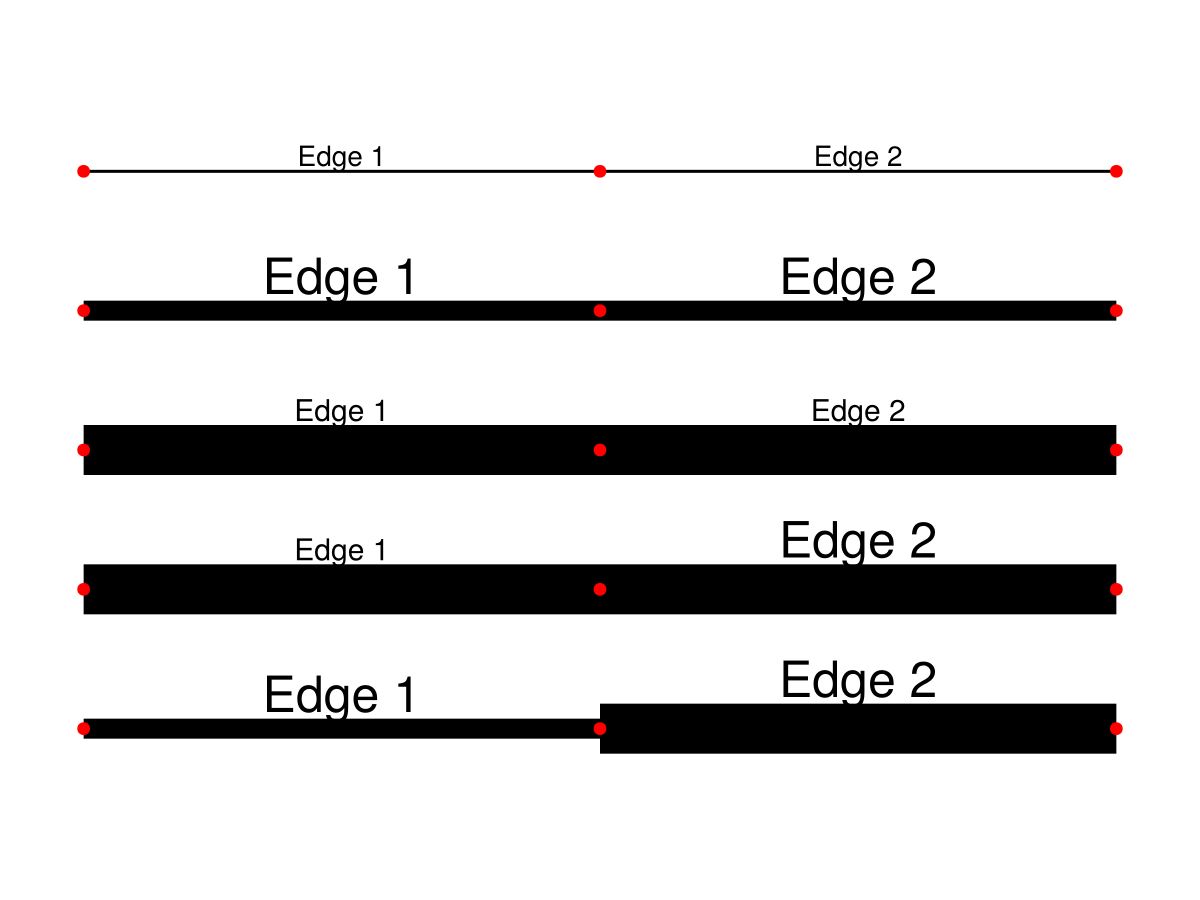

In [202]:
g = path_graph(3)
layout(y) = Point2f.([(0,-y),(1,-y),(2,-y)])
elabels = ["Edge 1", "Edge 2"]
node_color = :red

fig, ax, p = graphplot(g; layout=layout(0), elabels, node_color)
graphplot!(g; layout=layout(1), elabels, node_color, edge_width=10, elabels_fontsize=25)
graphplot!(g; layout=layout(2), elabels, node_color, edge_width=25, elabels_fontsize=15)
graphplot!(g; layout=layout(3), elabels, node_color, edge_width=25, elabels_fontsize=[15,25])
graphplot!(g; layout=layout(4), elabels, node_color, edge_width=[10,25], elabels_fontsize=25)
autolimits!(ax); hidedecorations!(ax); hidespines!(ax); ylims!(-5,1)
fig

In [257]:
# ========= 1️⃣ 定义图与 metadata ==========
g = Graph(6)
add_edge!(g, 1, 4)
add_edge!(g, 3, 3)
add_edge!(g, 5, 2)
add_edge!(g, 3, 1)
add_edge!(g, 1, 2)

# edge metadata: direction ∈ {-1, 0, 1}, magnitude ∈ [0, 1]
edge_meta = Dict{Edge, Dict{Symbol, Any}}()
for e in edges(g)
    # 随机示例方向与大小
    dir = rand([-1, 0, 1])
    mag = rand()
    edge_meta[e] = Dict(:direction => dir, :magnitude => mag)
end

In [259]:
edge_meta

Dict{Graphs.SimpleGraphs.SimpleEdge, Dict{Symbol, Any}} with 5 entries:
  Edge 1 => 2 => Dict(:magnitude=>0.355354, :direction=>1)
  Edge 2 => 5 => Dict(:magnitude=>0.0285622, :direction=>1)
  Edge 3 => 3 => Dict(:magnitude=>0.476327, :direction=>-1)
  Edge 1 => 3 => Dict(:magnitude=>0.572595, :direction=>-1)
  Edge 1 => 4 => Dict(:magnitude=>0.357899, :direction=>-1)

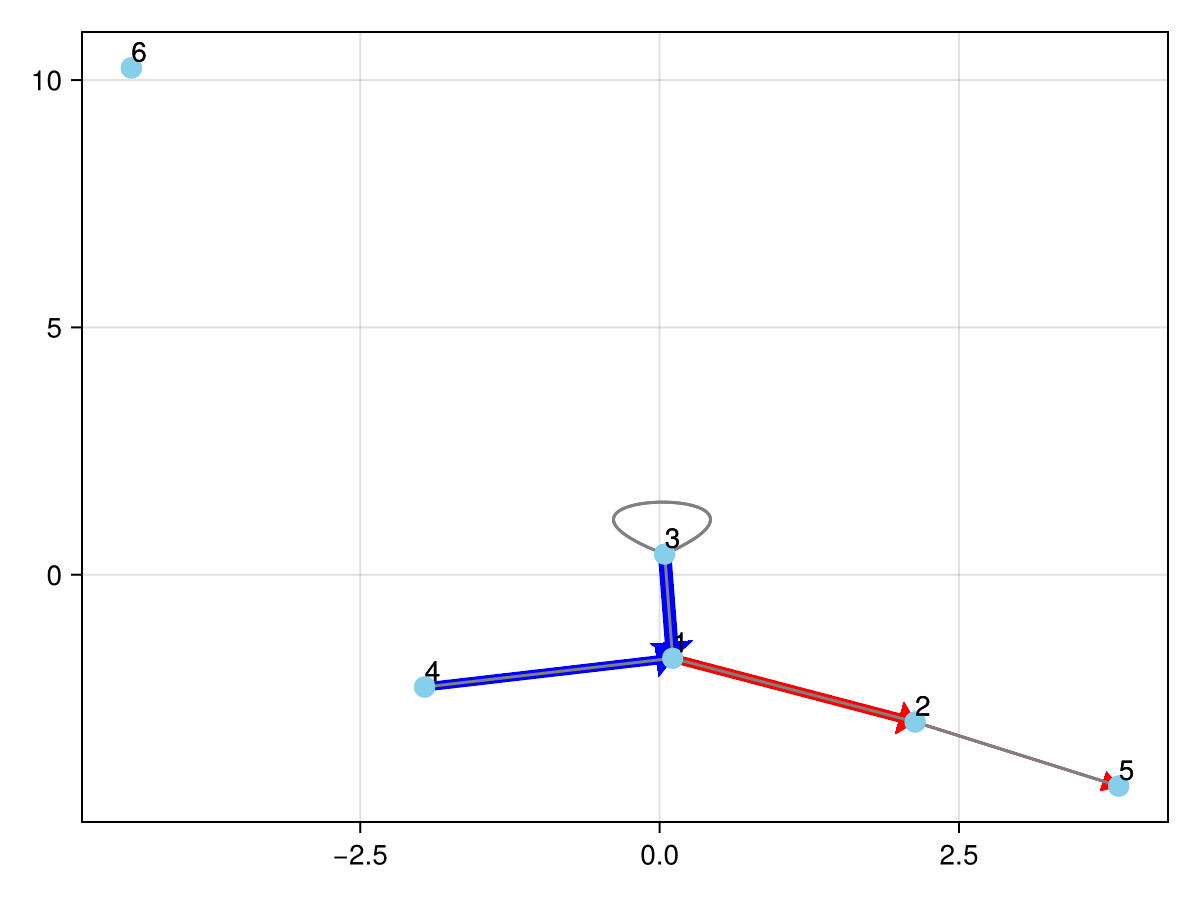

In [275]:
# ========= 2️⃣ 绘制基本图 ==========
fig, ax, p = graphplot(
    g;
    layout = Spring(),
    node_size = 15,
    node_color = :skyblue,
    edge_color = :gray,
    edge_width = 1.5,
    arrow_show = false,
    nlabels = repr.(1:nv(g))
)
# ========= 3️⃣ 根据 metadata 添加箭头 ==========
for e in edges(g)
    u, v = src(e), dst(e)
    meta = edge_meta[e]
    dir = meta[:direction]
    mag = meta[:magnitude]

    if dir == 0
        continue  # 不显示箭头
    end

    # 方向：正向或反向
    p1 = p[:node_pos][][u]
    p2 = p[:node_pos][][v]
    start, stop = dir > 0 ? (p1, p2) : (p2, p1)

    # 颜色与粗细由 magnitude 决定
    c = dir > 0 ? :red : :blue
    w = 1 + 10 * mag
    s = 10 + 20 * mag

    arrows2d!(
        ax, start, stop.-start;
        color = c,
        shaftwidth = w,
        tipwidth = s,
        # arrowhead = :simple
    )
end
# graphplot!(
#     g;
#     layout = Spring(),
#     node_size = 15,
#     node_color = :skyblue,
#     edge_color = :gray,
#     edge_width = 1.5,
#     arrow_show = false,
#     nlabels = repr.(1:nv(g))
# )
# fig


In [261]:
p[:node_pos][]

6-element Vector{Point{2, Float32}}:
 [0.10899118, -1.6891676]
 [2.1329153, -2.977129]
 [0.042077683, 0.41478267]
 [-1.961668, -2.270284]
 [3.8330812, -4.273247]
 [-4.4112597, 10.24543]

In [265]:
a = collect(edges(g))[1]

Edge 1 => 2

In [268]:
edge_meta[a]

Dict{Symbol, Any} with 2 entries:
  :magnitude => 0.355354
  :direction => 1

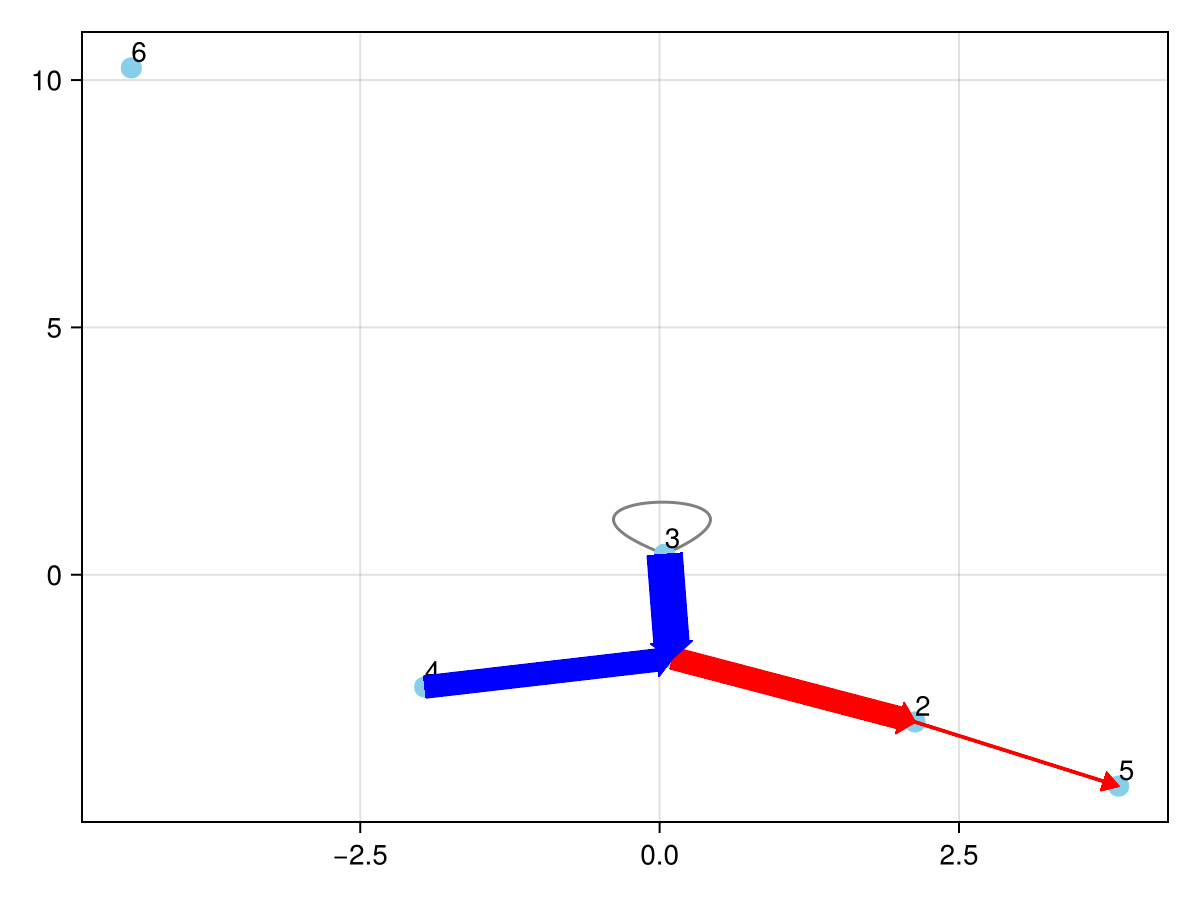